In [ ]:
#pip install tensorflow tensorflow-hub

##Prétraitement des données

In [1]:
import nltk
import pandas as pd
import numpy as np

# Télécharger les ressources nécessaires (si besoin)
# nltk.download('stopwords')
# nltk.download('punkt')

# Chargement des données
data = pd.read_csv('data/data_2021.csv')
data = data.sample(frac = 0.25, random_state=42)

data.head()

,Title,Body,Tags,Id,Score,ViewCount,AnswerCount,CreationDate
33553,Profile specific logging in Spring Boot,<p>We have a spring boot application using log...,<java><spring-boot><log4j2><spring-profiles><s...,69860469,1,1237,1,2021-11-06 00:07:26
9427,Merge a set of points/small contours into a bi...,<p>Is there any way to convert or merge sets o...,<python><opencv><curve-fitting><contour><bezier>,69178825,0,770,1,2021-09-14 13:35:22
199,select a td by table class,<p>I've searched online for the answer but</p>...,<javascript><html><jquery><css><html-table>,68921155,2,974,4,2021-08-25 10:27:06
12447,How to sum dataframe column sections up to a t...,<p>I have a first dataframe df1 that looks lik...,<python><pandas><dataframe><sum><conditional-s...,69263131,0,31,1,2021-09-21 03:44:43
39489,opencv python - remove small points noise in b...,<p>I am doing a document reader that parse all...,<python><opencv><image-processing><tesseract><...,70026530,1,1225,1,2021-11-18 20:44:54


In [2]:
import re
from nltk.corpus import stopwords
nltk.download('stopwords')  # Nécessaire pour les stopwords
nltk.download('punkt_tab')
# # in the columns, rename c# in c_sharp and c++ in c_plus_plus
# data = data.apply(lambda x: ['c_sharp' if tag == 'c#' else tag for tag in x])
# data = data.apply(lambda x: ['c_plus_plus' if tag == 'c++' else tag for tag in x])

# Fonction de nettoyage de texte
def clean_text(text):
    text = re.sub(r'[^\w\s#+]', '', text)  # Enlever la ponctuation
    text = text.lower()  # Convertir en minuscules
    text = re.sub(r'<[^>]+>', '', text)  # Enlever les balises HTML
    # tokens = nltk.word_tokenize(text)  # Tokenisation
    # tokens = [word for word in tokens if word not in stopwords.words('english')]  # Suppression des stopwords
    return text #' '.join(tokens)

# Exemple de données textuelles
data['cleaned_title'] = data['Title'].apply(clean_text)
data['clean_body'] = data['Body'].apply(clean_text)
data['clean_tags'] = data['Tags'].apply(lambda x: x.replace("><", " ").replace("<", "").replace(">", "").split())

data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Title,Body,Tags,Id,Score,ViewCount,AnswerCount,CreationDate,cleaned_title,clean_body,clean_tags
33553,Profile specific logging in Spring Boot,<p>We have a spring boot application using log...,<java><spring-boot><log4j2><spring-profiles><s...,69860469,1,1237,1,2021-11-06 00:07:26,profile specific logging in spring boot,pwe have a spring boot application using log4j...,"[java, spring-boot, log4j2, spring-profiles, s..."
9427,Merge a set of points/small contours into a bi...,<p>Is there any way to convert or merge sets o...,<python><opencv><curve-fitting><contour><bezier>,69178825,0,770,1,2021-09-14 13:35:22,merge a set of pointssmall contours into a big...,pis there any way to convert or merge sets of ...,"[python, opencv, curve-fitting, contour, bezier]"
199,select a td by table class,<p>I've searched online for the answer but</p>...,<javascript><html><jquery><css><html-table>,68921155,2,974,4,2021-08-25 10:27:06,select a td by table class,pive searched online for the answer butp\nprec...,"[javascript, html, jquery, css, html-table]"
12447,How to sum dataframe column sections up to a t...,<p>I have a first dataframe df1 that looks lik...,<python><pandas><dataframe><sum><conditional-s...,69263131,0,31,1,2021-09-21 03:44:43,how to sum dataframe column sections up to a t...,pi have a first dataframe df1 that looks like ...,"[python, pandas, dataframe, sum, conditional-s..."
39489,opencv python - remove small points noise in b...,<p>I am doing a document reader that parse all...,<python><opencv><image-processing><tesseract><...,70026530,1,1225,1,2021-11-18 20:44:54,opencv python remove small points noise in bi...,pi am doing a document reader that parse all t...,"[python, opencv, image-processing, tesseract, ..."


In [3]:
data = data.drop(columns=['Title', 'Body', 'Tags'])
data.head()

,Id,Score,ViewCount,AnswerCount,CreationDate,cleaned_title,clean_body,clean_tags
33553,69860469,1,1237,1,2021-11-06 00:07:26,profile specific logging in spring boot,pwe have a spring boot application using log4j...,"[java, spring-boot, log4j2, spring-profiles, s..."
9427,69178825,0,770,1,2021-09-14 13:35:22,merge a set of pointssmall contours into a big...,pis there any way to convert or merge sets of ...,"[python, opencv, curve-fitting, contour, bezier]"
199,68921155,2,974,4,2021-08-25 10:27:06,select a td by table class,pive searched online for the answer butp\nprec...,"[javascript, html, jquery, css, html-table]"
12447,69263131,0,31,1,2021-09-21 03:44:43,how to sum dataframe column sections up to a t...,pi have a first dataframe df1 that looks like ...,"[python, pandas, dataframe, sum, conditional-s..."
39489,70026530,1,1225,1,2021-11-18 20:44:54,opencv python remove small points noise in bi...,pi am doing a document reader that parse all t...,"[python, opencv, image-processing, tesseract, ..."


In [4]:
data['cleaned_title_body'] = data['cleaned_title'] + ' ' + data['clean_body']
data = data.drop(columns=['cleaned_title', 'clean_body'])
data.head()

,Id,Score,ViewCount,AnswerCount,CreationDate,clean_tags,cleaned_title_body
33553,69860469,1,1237,1,2021-11-06 00:07:26,"[java, spring-boot, log4j2, spring-profiles, s...",profile specific logging in spring boot pwe ha...
9427,69178825,0,770,1,2021-09-14 13:35:22,"[python, opencv, curve-fitting, contour, bezier]",merge a set of pointssmall contours into a big...
199,68921155,2,974,4,2021-08-25 10:27:06,"[javascript, html, jquery, css, html-table]",select a td by table class pive searched onlin...
12447,69263131,0,31,1,2021-09-21 03:44:43,"[python, pandas, dataframe, sum, conditional-s...",how to sum dataframe column sections up to a t...
39489,70026530,1,1225,1,2021-11-18 20:44:54,"[python, opencv, image-processing, tesseract, ...",opencv python remove small points noise in bi...


In [11]:
#Count the number of occurrences of each tag
tag_counts = data['clean_tags'].explode().value_counts()

#Get the top 10 most common tags
top_tags = tag_counts.head(10)

#Delete the other tags
data['clean_tags'] = data['clean_tags'].apply(lambda x: [tag for tag in x if tag in top_tags.index])

#Delete rows with clean_tags empty
data = data[data['clean_tags'].apply(len) > 0]

data.head()
data.shape

(7315, 7)

In [12]:
top_tags

clean_tags
python        2564
javascript    1998
java          1114
reactjs        936
html           780
node.js        707
android        698
pandas         568
css            505
arrays         501
Name: count, dtype: int64

In [13]:
# 1. Transformer la colonne en une liste de tags
all_tags = data['clean_tags'].explode().str.strip()

# 2. Compter les occurrences de chaque tag
tag_counts = all_tags.value_counts()

# 3. Calculer les pourcentages
tag_percent = tag_counts / tag_counts.sum() * 100

# 4. Préparer un DataFrame pour l'affichage
tag_df = pd.DataFrame({
    'tag': tag_counts.index,
    'count': tag_counts.values,
    'percent': tag_percent.values
})

In [14]:
tag_df

,tag,count,percent
0,python,2564,24.722785
1,javascript,1998,19.265259
2,java,1114,10.741491
3,reactjs,936,9.025166
4,html,780,7.520972
5,node.js,707,6.817086
6,android,698,6.730306
7,pandas,568,5.476810
8,css,505,4.869347
9,arrays,501,4.830778


C:\Users\mathi\AppData\Local\Temp\ipykernel_5240\2473024907.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tag_df, x='tag', y='count', palette='viridis')


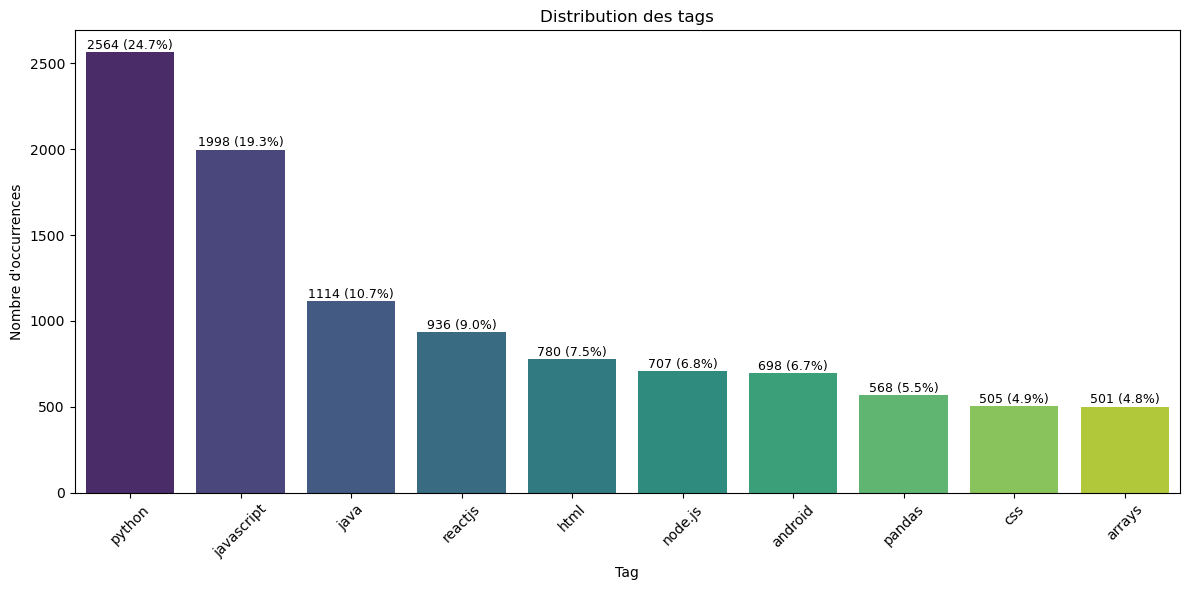

In [15]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt


# Tracé du barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=tag_df, x='tag', y='count', palette='viridis')

for i, row in tag_df.iterrows():
    plt.text(i, row['count'] + 0.5,
             f"{int(row['count'])} ({row['percent']:.1f}%)",
             ha='center', va='bottom', fontsize=9)

plt.title('Distribution des tags')
plt.xlabel('Tag')
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
import tensorflow_hub as hub
import tensorflow as tf

# Charger le modèle USE depuis TensorFlow Hub
use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Fonction pour obtenir l'embedding d'un texte avec USE
def get_use_embedding(text):
    return use_model([text]).numpy().flatten()

# Appliquer USE pour convertir chaque texte en embedding
data['use_embedding'] = data['cleaned_title_body'].apply(get_use_embedding)

In [15]:
data.head()

,Id,Score,ViewCount,AnswerCount,CreationDate,clean_tags,cleaned_title_body,use_embedding
33553,69860469,1,1237,1,2021-11-06 00:07:26,[java],profile specific logging in spring boot pwe ha...,"[-0.04296598, -0.007560627, -0.0602761, -0.006..."
9427,69178825,0,770,1,2021-09-14 13:35:22,[python],merge a set of pointssmall contours into a big...,"[-0.06454741, -0.06673579, 0.040491477, -0.056..."
199,68921155,2,974,4,2021-08-25 10:27:06,"[javascript, html, css]",select a td by table class pive searched onlin...,"[0.040511478, -0.067848295, 0.0467658, 0.06671..."
12447,69263131,0,31,1,2021-09-21 03:44:43,"[python, pandas]",how to sum dataframe column sections up to a t...,"[-0.06336666, -0.06664925, 0.032806825, -0.001..."
39489,70026530,1,1225,1,2021-11-18 20:44:54,[python],opencv python remove small points noise in bi...,"[-0.06772037, -0.051268514, 0.051491614, -0.00..."


##Enregistrement

In [16]:
# save as pikle
data.to_pickle('data/data_170125.pkl')

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# open the pkl
data = pd.read_pickle('data/data_170125.pkl')

In [18]:
data.head()

,Id,Score,ViewCount,AnswerCount,CreationDate,clean_tags,cleaned_title_body,use_embedding
33553,69860469,1,1237,1,2021-11-06 00:07:26,[java],profile specific logging in spring boot pwe ha...,"[-0.04296598, -0.007560627, -0.0602761, -0.006..."
9427,69178825,0,770,1,2021-09-14 13:35:22,[python],merge a set of pointssmall contours into a big...,"[-0.06454741, -0.06673579, 0.040491477, -0.056..."
199,68921155,2,974,4,2021-08-25 10:27:06,"[javascript, html, css]",select a td by table class pive searched onlin...,"[0.040511478, -0.067848295, 0.0467658, 0.06671..."
12447,69263131,0,31,1,2021-09-21 03:44:43,"[python, pandas]",how to sum dataframe column sections up to a t...,"[-0.06336666, -0.06664925, 0.032806825, -0.001..."
39489,70026530,1,1225,1,2021-11-18 20:44:54,[python],opencv python remove small points noise in bi...,"[-0.06772037, -0.051268514, 0.051491614, -0.00..."


In [19]:
# Séparation des données
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

##Entrainement du modèle

In [20]:
import mlflow

# Configurer MLflow pour enregistrer les données dans un dossier
mlflow.set_tracking_uri('http://127.0.0.1:5000')

In [21]:
import numpy as np
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, jaccard_score
from sklearn.preprocessing import MultiLabelBinarizer
import pickle
import mlflow.sklearn
import os

def train_and_evaluate_model_with_mlflow(X_train, X_test, train_tags, test_tags, embedding_type="embedding",name="name"):
    """
    Entraîne un modèle de classification multi-label avec MLflow, incluant la binarisation des tags
    et enregistre toutes les étapes (binariseur, modèle, métriques) dans MLflow.

    Parameters:
    - X_train: Les embeddings des données d'entraînement
    - X_test: Les embeddings des données de test
    - train_tags: Les tags bruts pour les données d'entraînement
    - test_tags: Les tags bruts pour les données de test
    - embedding_type: Le type d'embedding utilisé (str), ex. 'word2vec', 'bert', 'use', 'bow'
    """

    # Initialisation de MLflow
    with mlflow.start_run(run_name=name) as run:
        print(f"MLflow Tracking URI: {mlflow.get_tracking_uri()}")
        print(f"Experiment ID: {mlflow.active_run().info.experiment_id}")

        # Enregistrement des paramètres de prétraitement
        mlflow.log_param("preprocessing", "MultiLabelBinarizer")
        mlflow.log_param("embedding_type", embedding_type)

        # Binarisation des tags
        mlb = MultiLabelBinarizer()
        y_train = mlb.fit_transform(train_data['clean_tags'])
        y_test = mlb.transform(test_data['clean_tags'])

        # Sauvegarde du binariseur pour un futur usage
        binarizer_path = "mlb.pkl"
        with open(binarizer_path, "wb") as f:
            pickle.dump(mlb, f)

        # Enregistrer le binariseur comme artefact dans MLflow
        mlflow.log_artifact(binarizer_path)
        os.remove(binarizer_path)  # Nettoyer après sauvegarde

        # Enregistrement des paramètres du modèle
        mlflow.log_param("model_type", "MultiOutputClassifier")
        mlflow.log_param("base_estimator", "LogisticRegression")
        mlflow.log_param("penalty", "l2")  # Exemple d'hyperparamètre pour LogisticRegression

        # Conversion en tableau NumPy (si nécessaire)
        X_train = np.array(X_train.tolist()) if not isinstance(X_train, np.ndarray) else X_train
        X_test = np.array(X_test.tolist()) if not isinstance(X_test, np.ndarray) else X_test

        # Entraînement du modèle
        model = MultiOutputClassifier(LogisticRegression()).fit(X_train, y_train)

        # Prédiction sur les données de test
        y_pred = model.predict(X_test)

        # Mesure des performances
        report = classification_report(y_test, y_pred, output_dict=True)

        # Enregistrement des métriques dans MLflow pour chaque classe
        for label, metrics in report.items():
            if isinstance(metrics, dict):  # Vérifier si l'entrée est un dict (évite 'accuracy' globale)
                mlflow.log_metric(f"{label}_precision", metrics["precision"])
                mlflow.log_metric(f"{label}_recall", metrics["recall"])
                mlflow.log_metric(f"{label}_f1-score", metrics["f1-score"])

        # Enregistrement de l'accuracy globale si disponible
        if 'accuracy' in report:
            mlflow.log_metric("accuracy", report["accuracy"])
        else:
            print("Warning: 'accuracy' not found in classification_report.")

        # Calcul et enregistrement du jaccard_score moyen
        jaccard = jaccard_score(y_test, y_pred, average="samples")

#         jaccard = [
#     jaccard_score(y_test[i], y_pred[i], average=None)  # Pas de moyenne
#     for i in range(len(y_test))
# ]

        mlflow.log_metric("jaccard_score", jaccard)
        print(f"Jaccard Score: {jaccard}")

        # Calcul du taux de couverture des tags (supervisée)
        def coverage_score(y_true, y_pred):
            matches = (y_true * y_pred).sum(axis=1)
            return matches.sum() / y_true.sum()

        coverage = coverage_score(y_test, y_pred)
        mlflow.log_metric("coverage_score", coverage)
        print(f"Coverage Score (Supervised): {coverage}")

        # Enregistrement du modèle dans MLflow
        mlflow.sklearn.log_model(model, f"{embedding_type}_multi_label_model")

        print("Modèle et métriques enregistrés dans MLflow.")
        print(classification_report(y_test, y_pred))

    print(f"Run ID: {run.info.run_id}")

In [22]:
print("MLflow tracking URI:", mlflow.get_tracking_uri())

MLflow tracking URI: http://127.0.0.1:5000


In [23]:
train_and_evaluate_model_with_mlflow(train_data['use_embedding'], test_data['use_embedding'], train_data['clean_tags'], test_data['clean_tags'], embedding_type="use", name="use_veille_techno")

MLflow Tracking URI: http://127.0.0.1:5000
Experiment ID: 0


c:\Users\mathi\miniconda3\envs\P7OCR\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Jaccard Score: 0.634028252449305
Coverage Score (Supervised): 0.6536231884057971


2025/04/18 15:41:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
c:\Users\mathi\miniconda3\envs\P7OCR\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Modèle et métriques enregistrés dans MLflow.
              precision    recall  f1-score   support

           0       0.97      0.67      0.79       152
           1       0.70      0.37      0.48       100
           2       0.86      0.51      0.64       110
           3       0.79      0.47      0.59       169
           4       0.88      0.71      0.78       218
           5       0.72      0.68      0.70       393
           6       0.78      0.46      0.58       137
           7       0.86      0.64      0.74        98
           8       0.92      0.87      0.90       508
           9       0.81      0.47      0.59       185

   micro avg       0.84      0.65      0.73      2070
   macro avg       0.83      0.59      0.68      2070
weighted avg       0.83      0.65      0.73      2070
 samples avg       0.70      0.68      0.67      2070

🏃 View run use_veille_techno at: http://127.0.0.1:5000/#/experiments/0/runs/9cf4998ad7194b83891a4af8b3517fbf
🧪 View experiment at: http://127.